In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from load_data import get_data
# from graphs import get_summed_plot

# Hard-Coded Area:

In [2]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the moved data:')
moved_df.head(30)

looking at the moved data:


,surname,time,summed_time,time_group,visit_number,total_clearance_between_visit,total_clearance_summed,------------,clearance_between_visit,unmoved_visit_nr
0,1.Gasek,57,57,2,1,10.435940,10.435940,,10.435942,1
1,1.Gasek,958,1015,20,2,14.814190,25.250130,,-1.710566,2
2,1.Gasek,70,1085,3,3,10.424290,35.674420,,-2.877283,3
3,1.Gasek,63,1148,3,4,24.239930,59.914350,,24.671780,4
4,1.Gasek,238,1386,10,5,17.252580,77.166930,,-0.692089,5
5,2. Kolodziejska,217,217,9,1,66.956580,66.956580,,66.956580,1
6,2. Kolodziejska,42,259,2,2,41.810011,108.766590,,6.917547,2
7,2. Kolodziejska,26,285,1,5,25.568145,134.334736,,-10.812106,5
8,2. Kolodziejska,294,579,12,6,86.486312,220.821047,,22.210066,6
9,4. Krzyszton,35,35,1,1,-46.287701,-46.287701,,-17.363140,3


### Main Starting Graphs

In [3]:
# Make the plot prettier - legend, axis, size, 3 plots in one?
def get_summed_plot(df, agg = 'mean', label = ''):
    grouped_by_visit = df.groupby('visit_number', as_index = False).agg({'time' : 'mean', 'total_clearance_between_visit' : 'mean', 'clearance_between_visit' : 'mean'}, as_index = False)
    visits = [0] + list(grouped_by_visit['visit_number'])
    summed_clearances = [0] + list(grouped_by_visit['total_clearance_between_visit'])
    plt.plot(visits, summed_clearances, label = label)
    plt.xlabel('visit number')
    plt.ylabel('mean total_clearance_between_visit')

def get_total_clearance_between_visit_plot(df, agg = 'mean', label = ''):
    grouped_by_visit = df.groupby('visit_number', as_index = False).agg({'time' : 'mean', 'total_clearance_between_visit' : 'mean', 'clearance_between_visit' : 'mean'}, as_index = False)
    visits = [0] + list(grouped_by_visit['visit_number'])
    summed_clearances = [0] + list(grouped_by_visit['clearance_between_visit'])
    plt.plot(visits, summed_clearances, label = label)
    plt.xlabel('visit number')
    plt.ylabel('mean clearance_between_visit')

def time_group_based_avg_graph(df, agg = 'mean', label = ''):
    grouped_by_visit = df.groupby('time_group', as_index = False).agg({'time' : 'mean', 'total_clearance_between_visit' : 'mean', 'clearance_between_visit' : 'mean'}, as_index = False)
    time = [0] + list(grouped_by_visit['time_group'])
    summed_clearances = [0] + list(grouped_by_visit['total_clearance_between_visit'])
    plt.plot(time, summed_clearances, label = label)
    plt.xlabel('visit group')
    plt.ylabel('mean total_clearance_between_visit')

def time_based_avg_graph(df, agg = 'mean', label = ''):
    grouped_by_visit = df.groupby('time', as_index = False).agg({'time' : 'mean', 'total_clearance_between_visit' : 'mean', 'clearance_between_visit' : 'mean'}, as_index = False)
    time = [0] + list(grouped_by_visit['time'])
    summed_clearances = [0] + list(grouped_by_visit['total_clearance_between_visit'])
    plt.plot(time, summed_clearances, label = label)
    plt.xlabel('visit number')
    plt.ylabel('mean total_clearance_between_visit')

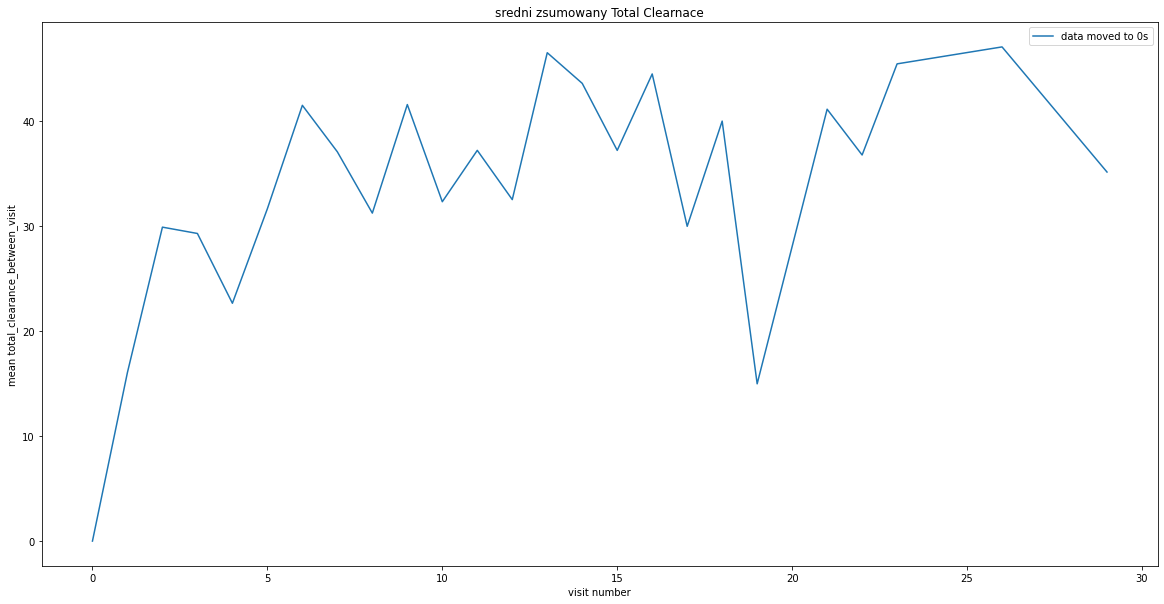

In [4]:
plt.figure(figsize=(20,10))
plt.title("sredni zsumowany Total Clearnace")
get_summed_plot(moved_df, label = 'data moved to 0s')
plt.legend()

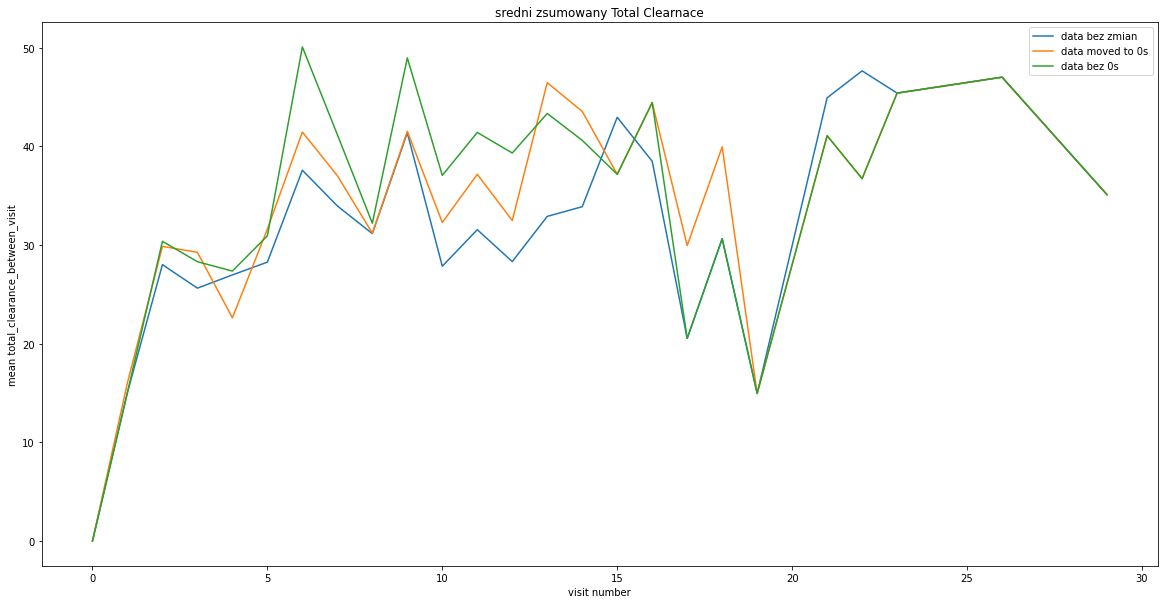

In [5]:
plt.figure(figsize=(20,10))
plt.title("sredni zsumowany Total Clearnace")
get_summed_plot(non_moved_df, label = 'data bez zmian')
get_summed_plot(moved_df, label = 'data moved to 0s')
get_summed_plot(non0s_df, label = 'data bez 0s')
plt.legend()

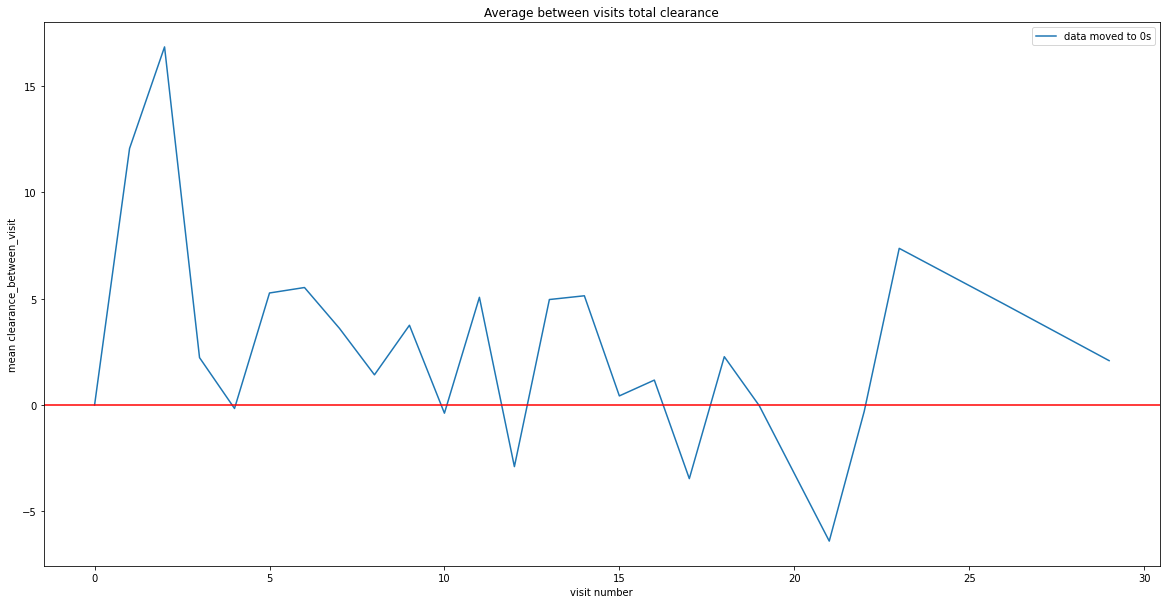

In [6]:
plt.figure(figsize=(20,10))
plt.title("Average between visits total clearance")
get_total_clearance_between_visit_plot(moved_df, label = 'data moved to 0s')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

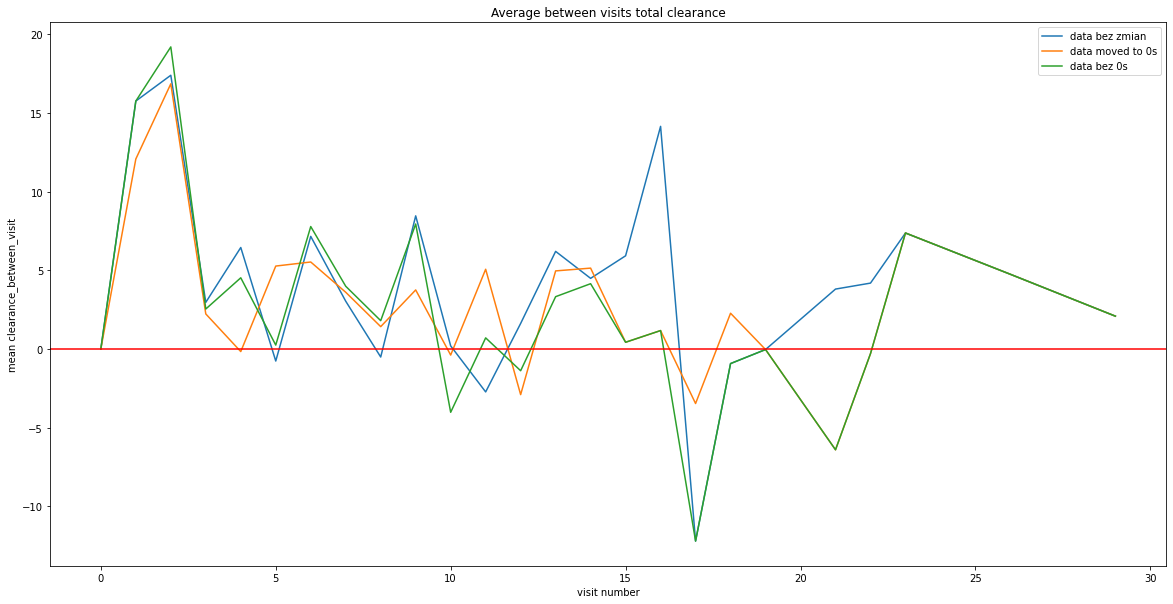

In [7]:
plt.figure(figsize=(20,10))
plt.title("Average between visits total clearance")
get_total_clearance_between_visit_plot(non_moved_df, label = 'data bez zmian')
get_total_clearance_between_visit_plot(moved_df, label = 'data moved to 0s')
get_total_clearance_between_visit_plot(non0s_df, label = 'data bez 0s')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()


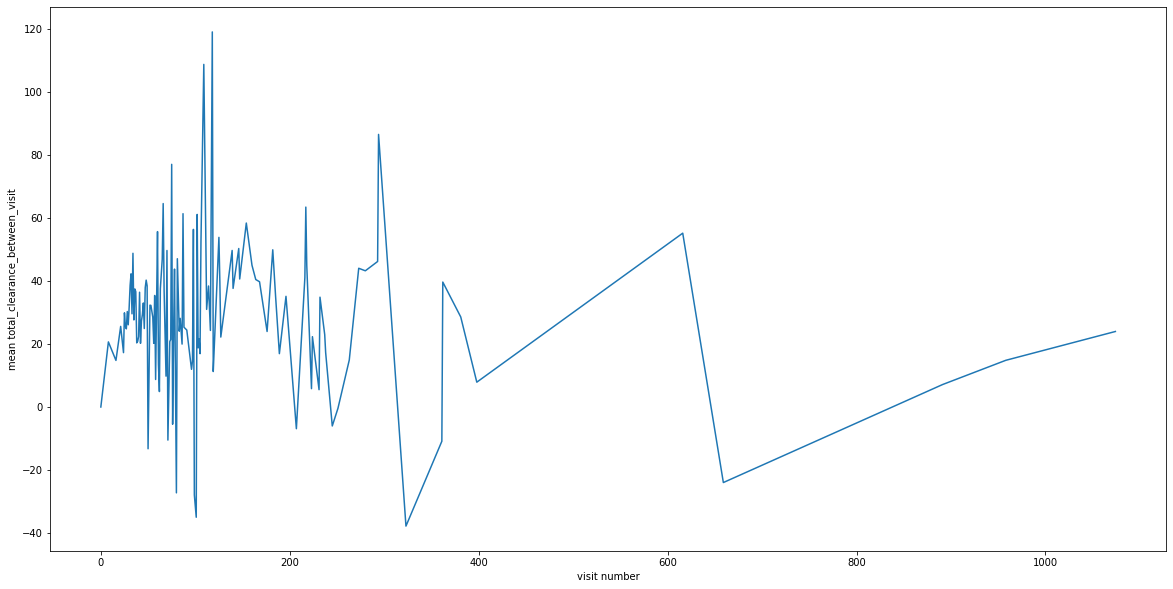

In [8]:
plt.figure(figsize=(20,10))
# plt.title("sredni zsumowany Total Clearnace")
time_based_avg_graph(moved_df)


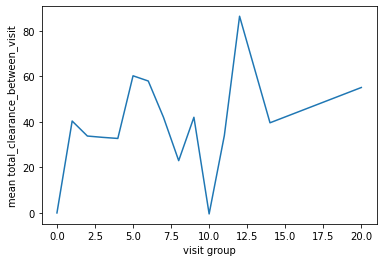

In [9]:
time_group_based_avg_graph(moved_df.loc[moved_df.visit_number > 5])

In [10]:
time_group_based_avg_graph(moved_df)

SyntaxError: invalid syntax (<ipython-input-10-4e9fe8ef68f2>, line 1)

### All users plots:

In [8]:
def plot_all_users(df, title = ''):
    unique_surnames = df.surname.unique()
    grouped = df.groupby(df.surname)
    plt.figure(figsize=(30,15))
    for surname in unique_surnames:
        df_new = grouped.get_group(surname)
        visits = [0] + list(df_new['visit_number'])
        summed_clearances = [0] + list(df_new['total_clearance_summed'])
        plt.plot(visits, summed_clearances, label = surname)
    
    plt.xlabel('visit number')
    plt.ylabel('mean clearance_between_visit')
    plt.legend()
    plt.title(title)
    plt.xlim(0,20)

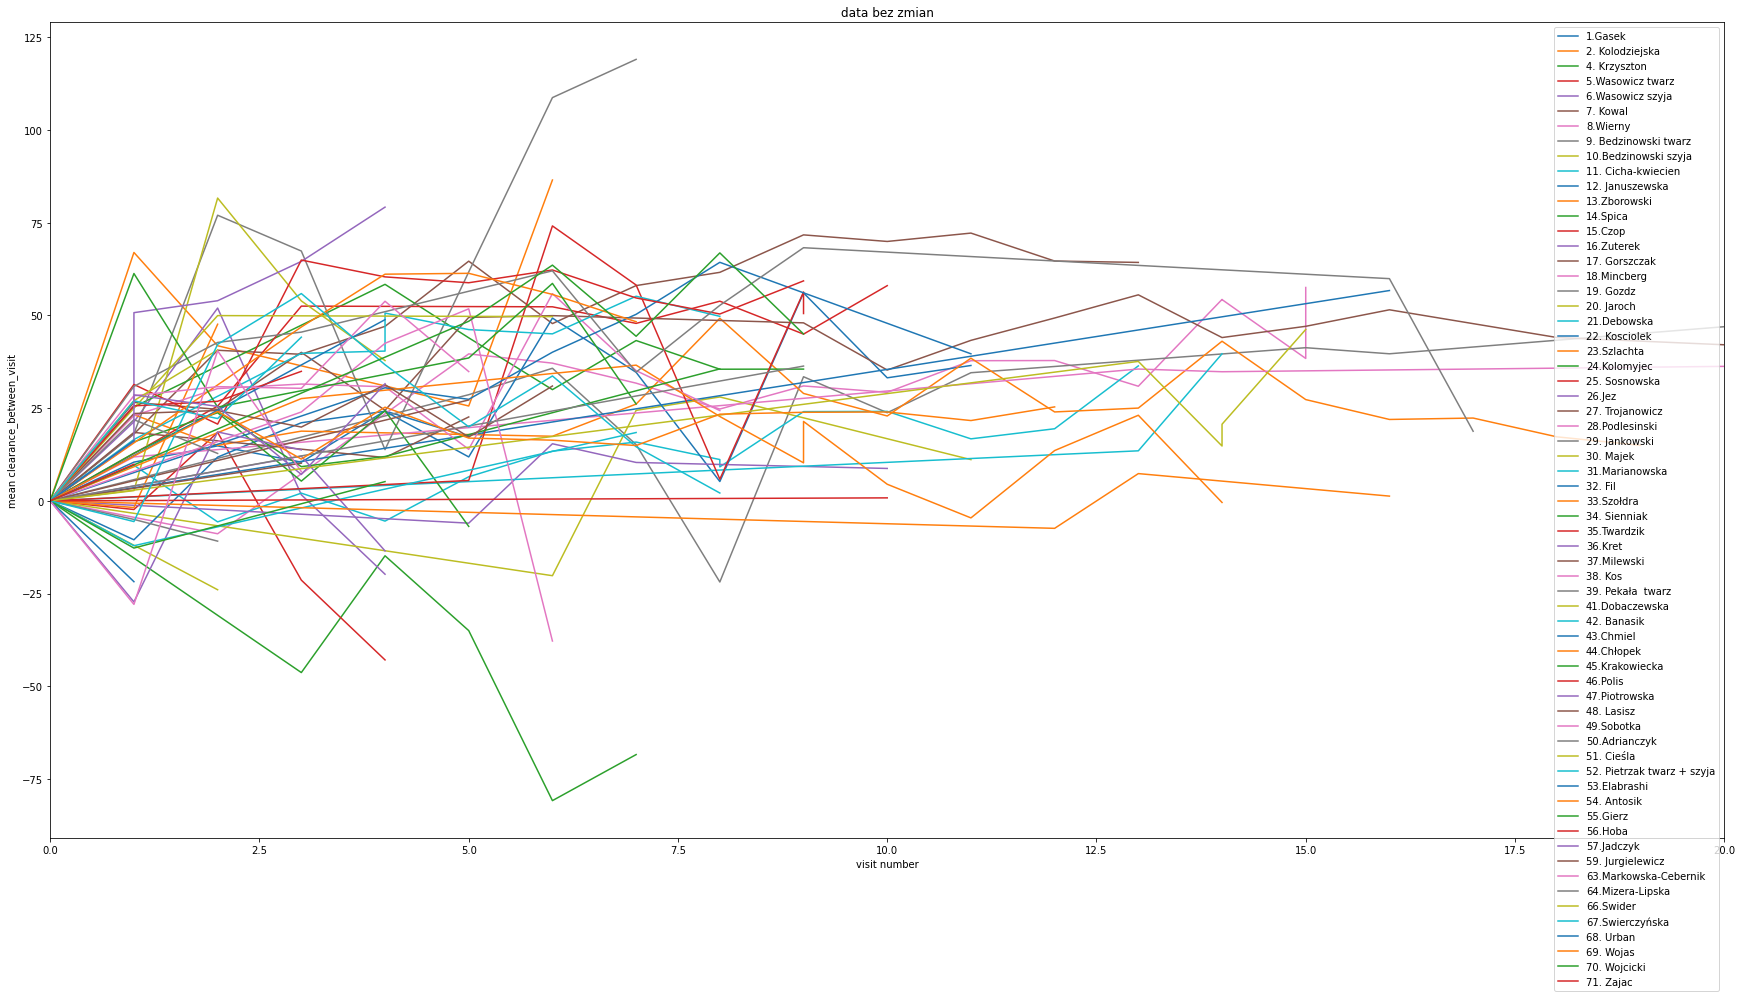

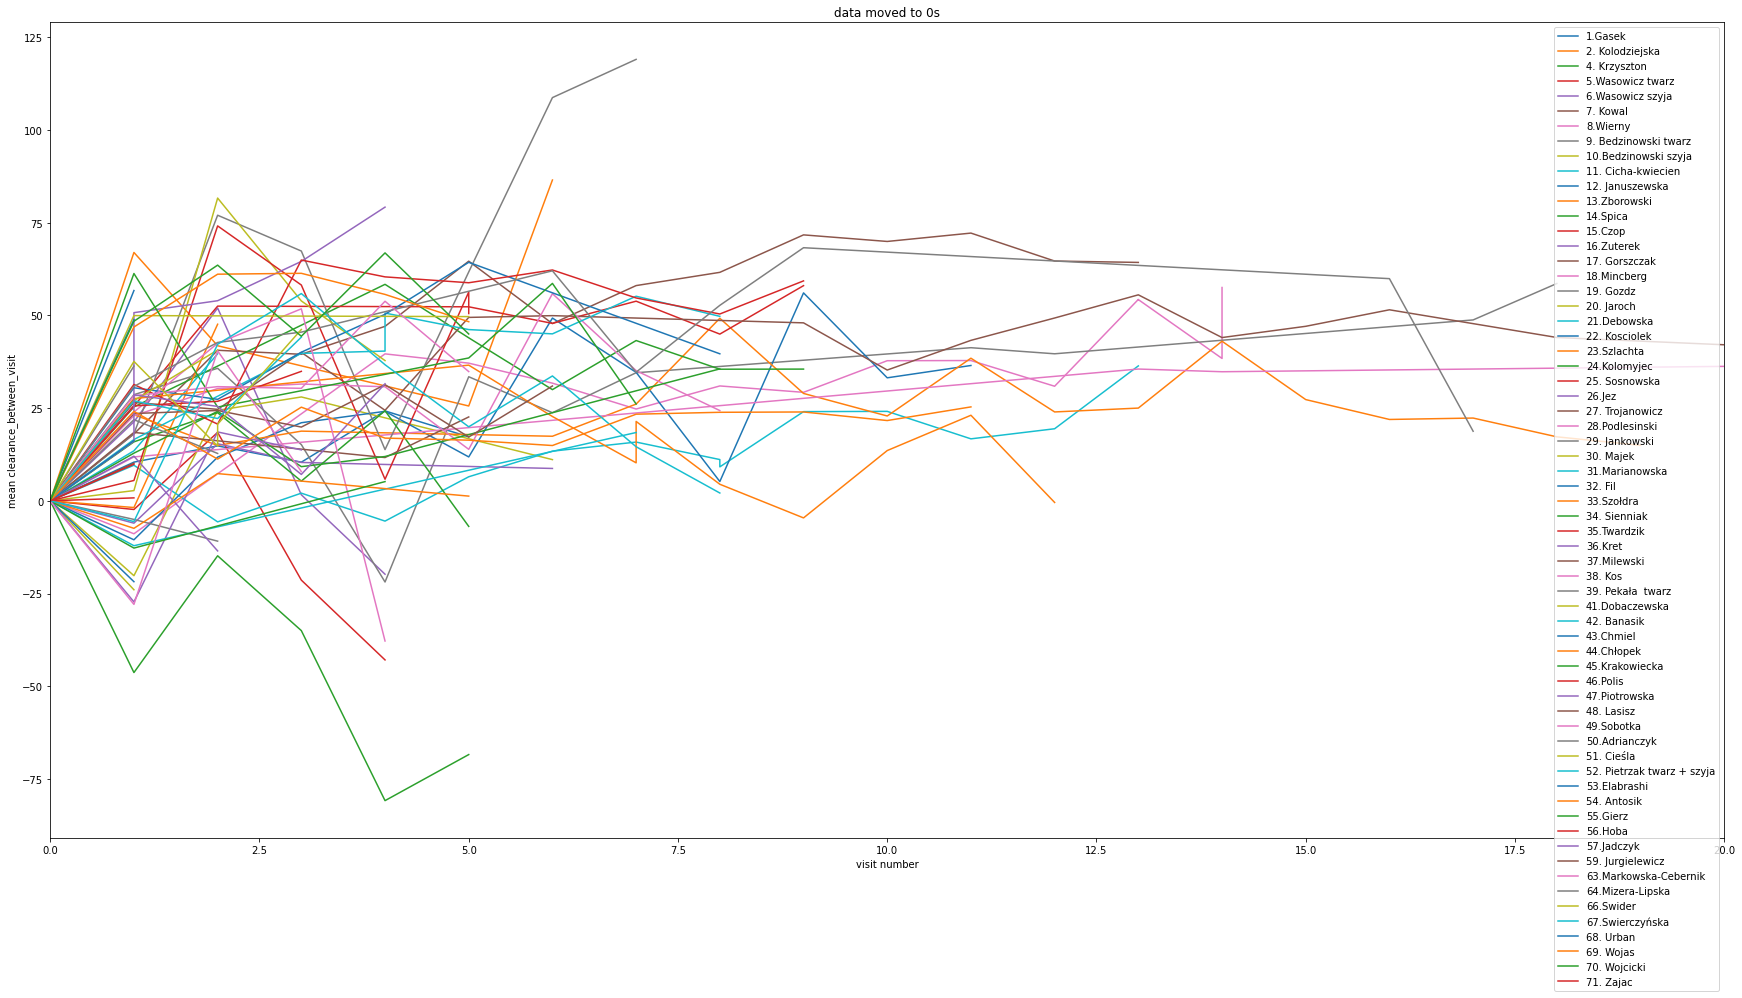

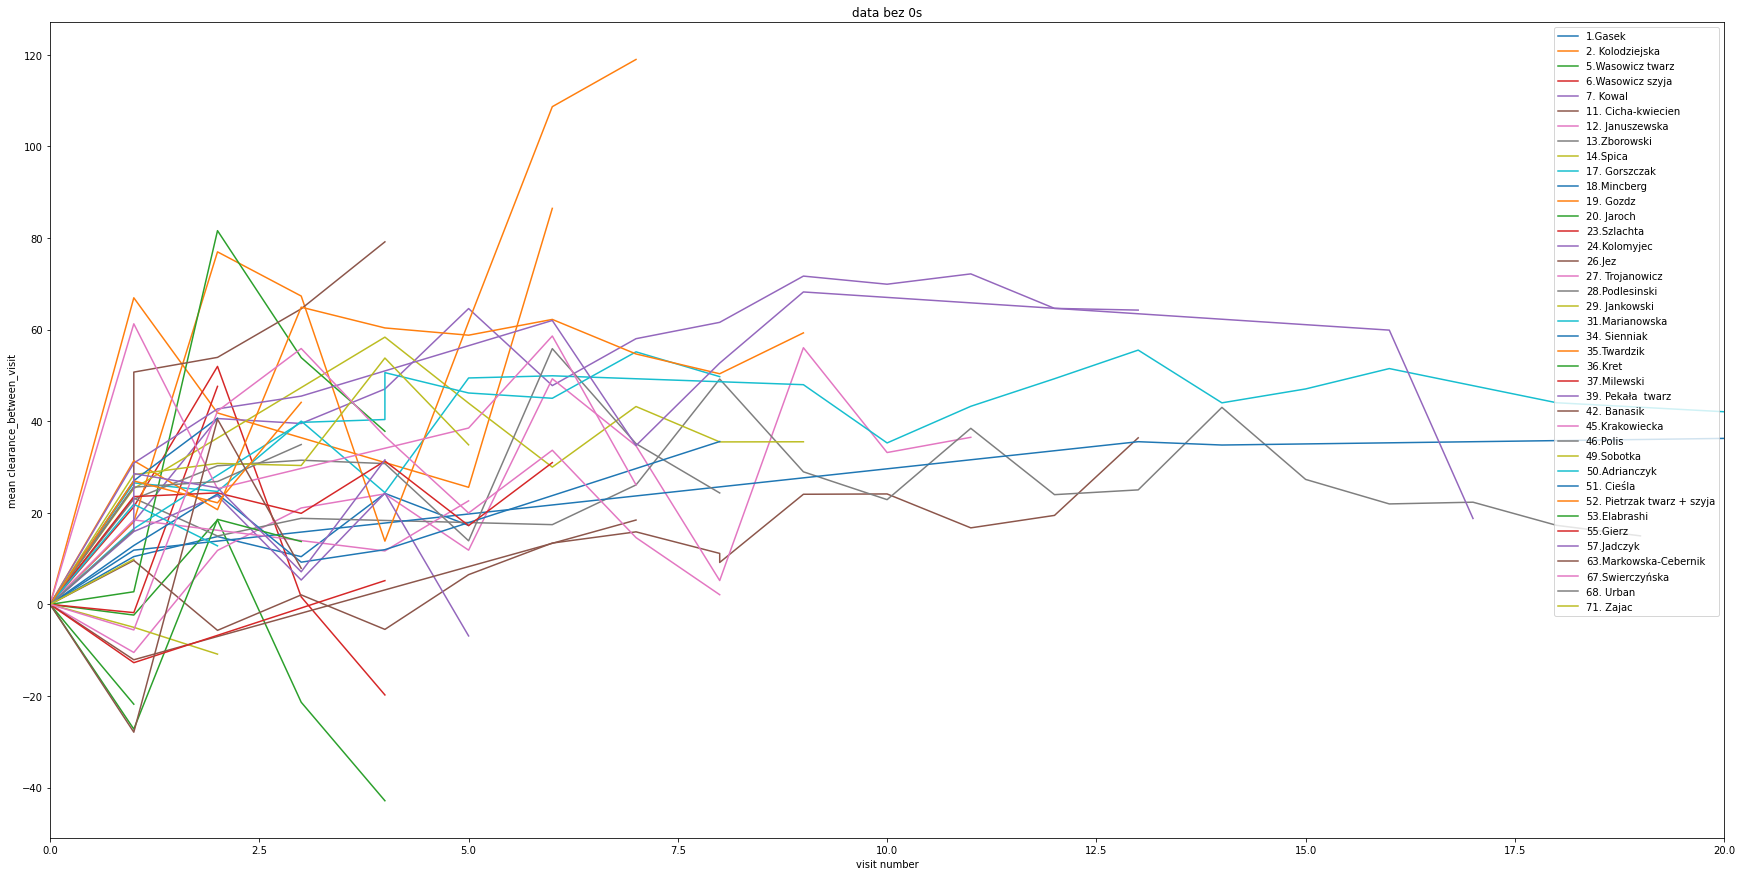

In [9]:
plot_all_users(non_moved_df, title = 'data bez zmian')
plot_all_users(moved_df, title = 'data moved to 0s')
plot_all_users(non0s_df, title = 'data bez 0s')

# Exploratory area:
### Few notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit